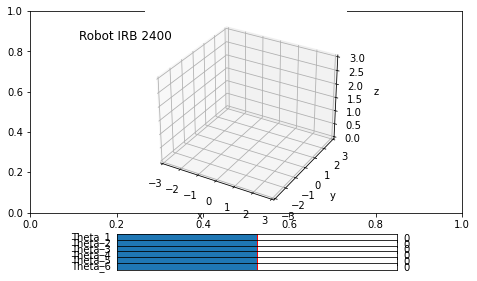

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(left = 0, bottom = 0.3, right =1, top = 1)
ax = plt.axes(projection = "3d")

# Function to rotate on the x axis
def matrix_rotation_x(degrees):
	rad = degrees/180*np.pi
	#Rotation matrix
	rotation=np.array([[1,0,0,0],
					   [0,np.cos(rad),-np.sin(rad),0],
					   [0,np.sin(rad),np.cos(rad),0],
					   [0,0,0,1]])
	return rotation

# Function to rotate in the z axis
def matrix_rotation_z(degrees):
	rad = degrees/180*np.pi
	#Rotating matrix
	rotation=np.array([[np.cos(rad),-np.sin(rad),0,0],
					   [np.sin(rad),np.cos(rad),0,0],
					   [0,0,1,0],
					   [0,0,0,1]])
	return rotation

# Function to translate on the x axis
def matrix_translation_x(x):
	translation = np.array([[1,0,0,x],
						   [0,1,0,0],
						   [0,0,1,0],	   
						   [0,0,0,1]])
	return translation

# Function to translate in the z axis
def matrix_translation_z(z):
	translation = np.array([[1,0,0,0],
						   [0,1,0,0],
						   [0,0,1,z],	   
						   [0,0,0,1]])
	return translation

# Function for graphical configuration
def graphic_configuration():
	# Title of the chart
	plt.title("Robot IRB 2400", x = 0.03, y = 30)
	# Chart limits
	ax.set_xlim(-3,3)
	ax.set_ylim(-3,3)
	ax.set_zlim(0,3)
	# Labels to identify the axes
	ax.set_xlabel("x")
	ax.set_ylabel("y")
	ax.set_zlabel("z")

# Function for Denavit-Hartenberg operation
def DH(theta_i, di, ai, alpha_i):
	MT = matrix_rotation_z(theta_i)@matrix_translation_z(di)@matrix_translation_x(ai)@matrix_rotation_x(alpha_i)
	return MT

# Composition of homogeneous transformation matrices
def Quadruped(theta_1, d1, a1, alpha_1, 
			   theta_2, d2, a2, alpha_2,
			   theta_3, d3, a3, alpha_3,
			   theta_4, d4, a4, alpha_4,
			   theta_5, d5, a5, alpha_5,
			   theta_6, d6, a6, alpha_6):
	
	# Leg 1 Right front
	A0 = np.eye(4)
	_0A1 = DH(theta_1, d1, a1, alpha_1)
	_1A2 = DH(theta_2, d2, a2, alpha_2)
	_2A3 = DH(theta_3, d3, a3, alpha_3)
	_3A4 = DH(theta_4, d4, a4, alpha_4)
	_4A5 = DH(theta_5, d5, a5, alpha_5)
	_5A6 = DH(theta_6, d6, a6, alpha_6)
	_0A2 = _0A1@_1A2
	_0A3 = _0A2@_2A3
	_0A4 = _0A3@_3A4
	_0A5 = _0A4@_4A5
	_0A6 = _0A5@_5A6

	# The links are drawn
	ax.plot3D([A0[0,3],_0A1[0,3]],[A0[1,3],_0A1[1,3]],[A0[2,3],_0A1[2,3]], color = 'red')
	ax.plot3D([_0A1[0,3],_0A2[0,3]],[_0A1[1,3],_0A2[1,3]],[_0A1[2,3],_0A2[2,3]], color = 'green')
	ax.plot3D([_0A2[0,3],_0A3[0,3]],[_0A2[1,3],_0A3[1,3]],[_0A2[2,3],_0A3[2,3]], color = 'red')
	ax.plot3D([_0A3[0,3],_0A4[0,3]],[_0A3[1,3],_0A4[1,3]],[_0A3[2,3],_0A4[2,3]], color = 'red')
	ax.plot3D([_0A4[0,3],_0A5[0,3]],[_0A4[1,3],_0A5[1,3]],[_0A4[2,3],_0A5[2,3]], color = 'red')
	ax.plot3D([_0A5[0,3],_0A6[0,3]],[_0A5[1,3],_0A6[1,3]],[_0A5[2,3],_0A6[2,3]], color = 'green')

# The joints are updated every time the value of an angle is modified with the slider
def joint_update(val):
		ax.cla()
		graphic_configuration()
		theta_1 = sld_ang_1.val
		theta_2 = sld_ang_2.val
		theta_3 = sld_ang_3.val
		theta_4 = sld_ang_4.val
		theta_5 = sld_ang_5.val
		theta_6 = sld_ang_6.val

		# Denavit-Hartenberg parameters obtained in the table
		Quadruped(theta_1, 0.2, 0, -90,
				   theta_2, 0, 2, 0,
				   theta_3, 0, 0, 90,
				   theta_4, 1.4, 0, -90,
				   theta_5, 0, 0, 90,
				   theta_6, 0.4, 0, 0)
		plt.draw()
		plt.pause(1e-3)

# Design of the sliders
ax1 = plt.axes([0.2,0.20,0.65,0.026])
ax2 = plt.axes([0.2,0.18,0.65,0.026])
ax3 = plt.axes([0.2,0.16,0.65,0.026])
ax4 = plt.axes([0.2,0.14,0.65,0.026])
ax5 = plt.axes([0.2,0.12,0.65,0.026])
ax6 = plt.axes([0.2,0.10,0.65,0.026])

# Creation of sliders
sld_ang_1 = Slider(ax1, "Theta_1",-180,180,valinit = 0)
sld_ang_2 = Slider(ax2, "Theta_2",-180,180,valinit = 0)
sld_ang_3 = Slider(ax3, "Theta_3",-180,180,valinit = 0)
sld_ang_4 = Slider(ax4, "Theta_4",-180,180,valinit = 0)
sld_ang_5 = Slider(ax5, "Theta_5",-180,180,valinit = 0)
sld_ang_6 = Slider(ax6, "Theta_6",-180,180,valinit = 0)

# Every time a slider is moved the joints are updated
graphic_configuration()
sld_ang_1.on_changed(joint_update)
sld_ang_2.on_changed(joint_update)
sld_ang_3.on_changed(joint_update)
sld_ang_4.on_changed(joint_update)
sld_ang_5.on_changed(joint_update)
sld_ang_6.on_changed(joint_update)

plt.show()